In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
from ultralytics import YOLO
import glob
import os
import re

import matplotlib.pyplot as plt
from ultralytics import YOLO
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# Распознавание для одного файла (для бота в Телеграм)

In [ ]:
from pathlib import Path

data_dir = Path('/content/drive/MyDrive/Zlata/bird/1_1.jpg')

In [ ]:
def is_bird(image_path, model_path='yolov8s.pt', conf_threshold=0.5):
    model = YOLO(model_path)
    results = model.predict(source=image_path, conf=conf_threshold)
    for result in results:
        for box in result.boxes:
            cls_id = int(box.cls[0])
            score = float(box.conf[0])
            class_name = result.names[cls_id]
            if class_name.lower() == 'bird' and score >= conf_threshold:
                return 1
    return 0

In [ ]:
is_bird(data_dir, model_path='yolov8s.pt', conf_threshold=0.5)


image 1/1 /content/drive/MyDrive/Zlata/bird/1_1.jpg: 448x640 2 persons, 404.8ms
Speed: 3.2ms preprocess, 404.8ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


0

# Распознаввание для папки с файлами (на примере Bird_data)

In [ ]:
def count_birds(images_folder, model_path="yolov8s.pt", conf=0.5):
    model = YOLO(model_path)
    image_paths = glob.glob(os.path.join(images_folder, "*.jpg"))
    if not image_paths:
        print("Не найдены изображения *.jpg в папке:", images_folder)
        return
    bird_counts = []

    for img_path in image_paths:
        results = model.predict(source=img_path, conf=conf)
        total_birds = 0

        for result in results:
            for box in result.boxes:
                cls_id = int(box.cls[0])
                class_name = result.names[cls_id]
                if class_name.lower() == "bird":
                    total_birds += 1

        bird_counts.append(total_birds)
        print(f"[{os.path.basename(img_path)}] Найдено птиц: {total_birds}")

    images_with_birds = sum(1 for c in bird_counts if c > 0)
    images_without_birds = sum(1 for c in bird_counts if c == 0)
    print(f"Всего изображений: {len(image_paths)}")
    print(f"С птицами: {images_with_birds}")
    print(f"Без птиц: {images_without_birds}")

    #Гистограмма распределения количества птиц
    max_birds = max(bird_counts) if bird_counts else 0
    bins_range = range(0, max_birds + 2) if max_birds > 0 else range(0, 2)

    plt.figure(figsize=(6, 4))
    plt.hist(bird_counts, bins=bins_range, align='left', rwidth=0.8,
             edgecolor='black', color='#3DD2BA',)
    plt.xlabel("Число птиц на изображении")
    plt.ylabel("Количество изображений")
    plt.title("Распределение количества птиц")
    plt.grid(axis='y', alpha=0.75)
    plt.show()

    #График "С птицами" vs "Без птиц"
    plt.figure(figsize=(5, 4))
    labels = ["С птицами", "Без птиц"]
    values = [images_with_birds, images_without_birds]

    plt.bar(labels, values, color=["#3DD2BA", "#B2EDFF"])
    plt.ylabel("Количество изображений")
    plt.title("Сравнение: изображения с птицами и без")
    for i, v in enumerate(values):
        plt.text(i, v + 0.5, str(v), ha='center', fontsize=12)
    plt.ylim([0, max(values) + 2])
    plt.show()
    #Круговая диаграмма
    plt.figure(figsize=(5,5))
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)

    plt.title("Процент изображений с птицами и без")
    plt.axis('equal')
    plt.show()


image 1/1 /content/drive/MyDrive/Zlata/bird/1_5.jpg: 416x640 1 bird, 779.1ms
Speed: 11.4ms preprocess, 779.1ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 640)
[1_5.jpg] Найдено птиц: 1

image 1/1 /content/drive/MyDrive/Zlata/bird/1_13.jpg: 448x640 1 bird, 653.0ms
Speed: 4.8ms preprocess, 653.0ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)
[1_13.jpg] Найдено птиц: 1

image 1/1 /content/drive/MyDrive/Zlata/bird/1_23.jpg: 512x640 1 bird, 753.3ms
Speed: 5.3ms preprocess, 753.3ms inference, 1.8ms postprocess per image at shape (1, 3, 512, 640)
[1_23.jpg] Найдено птиц: 1

image 1/1 /content/drive/MyDrive/Zlata/bird/1_12.jpg: 384x640 1 bird, 626.6ms
Speed: 3.7ms preprocess, 626.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
[1_12.jpg] Найдено птиц: 1

image 1/1 /content/drive/MyDrive/Zlata/bird/1_7.jpg: 480x640 1 bird, 556.6ms
Speed: 3.2ms preprocess, 556.6ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)
[1_7.jpg]

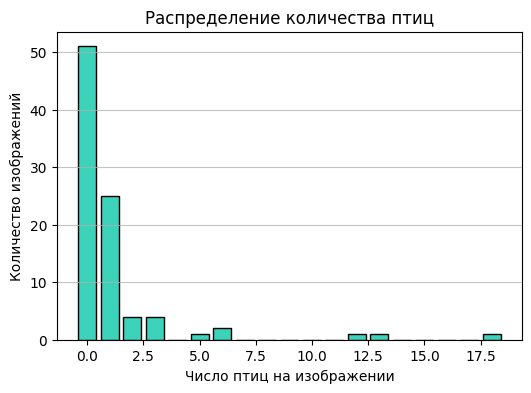

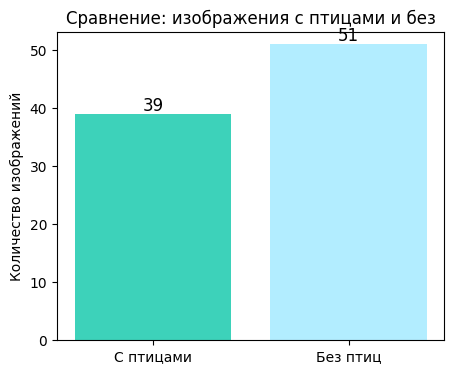

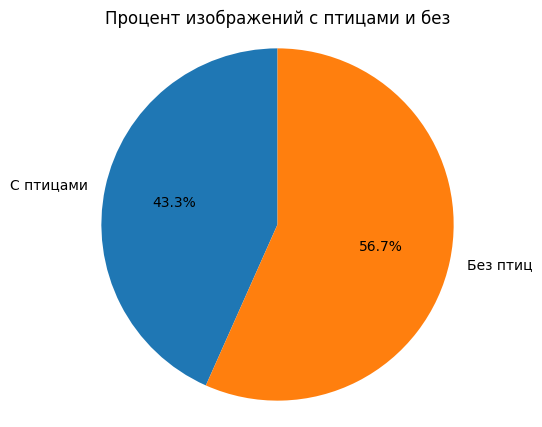

In [ ]:
# Использование
images_folder = "/content/drive/MyDrive/Zlata/bird"
count_birds(images_folder, "yolov8s.pt", conf=0.5)

## Расчет правильности распознавания

In [ ]:
def compute_f1(images_folder,
                         model_path="yolov8s.pt",
                         conf=0.5):
    model = YOLO(model_path)
    image_paths = glob.glob(os.path.join(images_folder, "*.jpg"))
    if not image_paths:
        print("Нет изображений в папке:", images_folder)
        return
    y_true = []
    y_pred = []

    for img_path in image_paths:
        filename = os.path.basename(img_path)
        if "1" in filename:
            true_label = 1
        elif "0" in filename:
            true_label = 0
        y_true.append(true_label)
        results = model.predict(source=img_path, conf=conf)
        total_birds = 0
        for result in results:
            for box in result.boxes:
                cls_id = int(box.cls[0])
                class_name = result.names[cls_id]
                if class_name.lower() == "bird":
                    total_birds += 1

        predicted_label = 1 if total_birds > 0 else 0
        y_pred.append(predicted_label)

        print(f"[{filename}] true={true_label}, predicted={predicted_label}, birds_found={total_birds}")

    f1 = f1_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    print(f"F1-score:       {f1:.3f}")
    print(f"Precision (P):  {prec:.3f}")
    print(f"Recall (R):     {rec:.3f}")
    cm = confusion_matrix(y_true, y_pred, labels=[0,1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["NoBird(0)", "Bird(1)"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()


image 1/1 /content/drive/MyDrive/Zlata/bird/1_5.jpg: 416x640 1 bird, 737.5ms
Speed: 4.8ms preprocess, 737.5ms inference, 6.3ms postprocess per image at shape (1, 3, 416, 640)
[1_5.jpg] true=1, predicted=1, birds_found=1

image 1/1 /content/drive/MyDrive/Zlata/bird/1_13.jpg: 448x640 1 bird, 831.1ms
Speed: 13.4ms preprocess, 831.1ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)
[1_13.jpg] true=1, predicted=1, birds_found=1

image 1/1 /content/drive/MyDrive/Zlata/bird/1_23.jpg: 512x640 1 bird, 1509.2ms
Speed: 4.8ms preprocess, 1509.2ms inference, 1.6ms postprocess per image at shape (1, 3, 512, 640)
[1_23.jpg] true=1, predicted=1, birds_found=1

image 1/1 /content/drive/MyDrive/Zlata/bird/1_12.jpg: 384x640 1 bird, 880.6ms
Speed: 3.7ms preprocess, 880.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
[1_12.jpg] true=1, predicted=1, birds_found=1

image 1/1 /content/drive/MyDrive/Zlata/bird/1_7.jpg: 480x640 1 bird, 809.5ms
Speed: 6.2ms preprocess, 809.

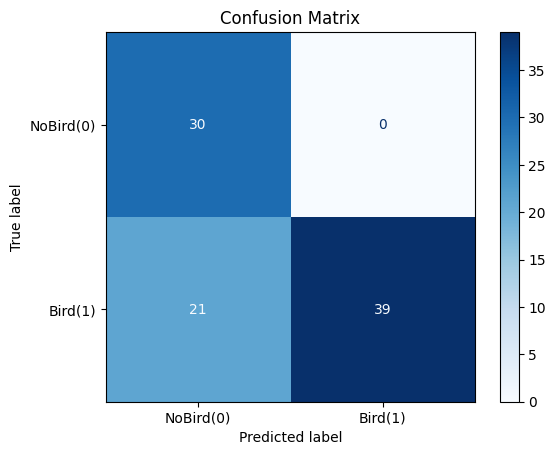

In [ ]:
# Использование
images_folder = "/content/drive/MyDrive/Zlata/bird"
compute_f1(images_folder, model_path="yolov8s.pt", conf=0.5)